<a href="https://colab.research.google.com/github/caiociardelli/Sensitivity_Kernels/blob/main/Amplitude_and_travel_time_sensitivity_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amplitude and travel-time sensitivity kernels

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., 2022. Sensitivity kernels in seismic wave propagation: A simplified explanation for the banana-doughnut paradox. European Journal of Physics, submitted.
<br>
<br>

In [ ]:
from matplotlib import rc
from matplotlib.patches import Rectangle, Ellipse, Arc, Polygon

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

rc ('text', usetex = True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-extra is already the newest version (2017.20180305-2).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


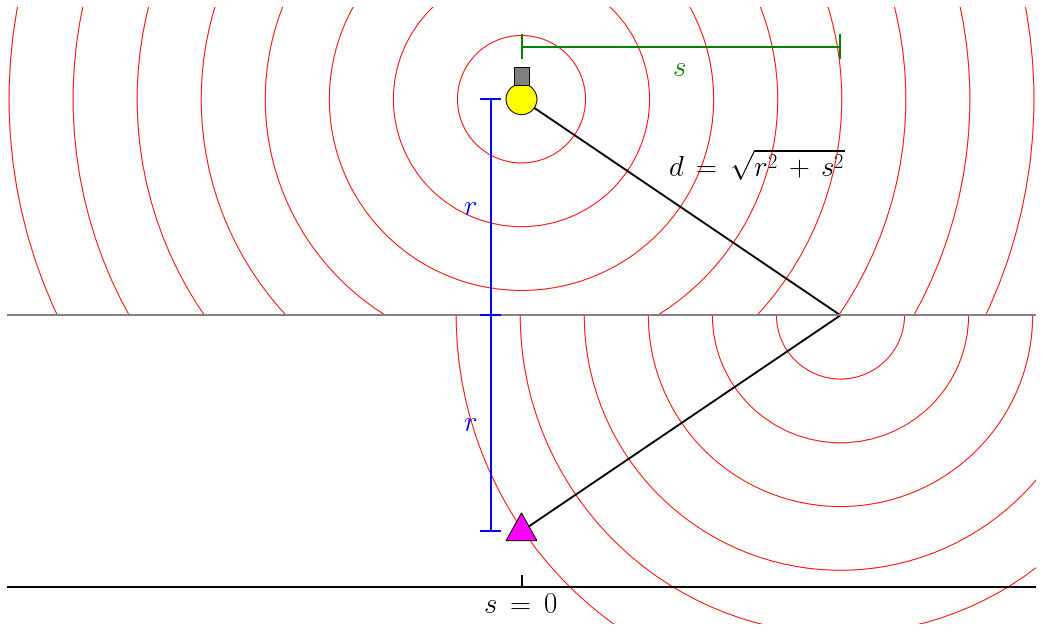

In [ ]:
if __name__ == '__main__':

  fig = plt.figure (figsize = (15, 9), dpi = 70)
  ax = fig.add_subplot (111)

  for r in range (1, 11):

    fw = Ellipse ((0, 0.7), 0.249 * r, 0.413 * r, color = 'red',
                  fill = False)
    ax.add_patch (fw)

  base = Rectangle ((-1, -1), 2, 1, facecolor = 'white',
                    edgecolor = 'white')
  ax.add_patch (base)

  for r in range (1, 7):

    bw = Arc ((0.62, 0.0), 0.249 * r, 0.413 * r, theta1 = 180,
              theta2 = 360, color = 'red', fill = False)
    ax.add_patch (bw)

  ray1 = Polygon ([[0, 0.7], [0.62, 0.0]], closed = False,
                  color = 'black', linewidth = 2)
  ray2 = Polygon ([[0.62, 0.0], [0.0, -0.7]], closed = False,
                  color = 'black', linewidth = 2)
  socket = Rectangle ((-0.0155, 0.7455), 0.03, 0.06,
                      facecolor = 'grey', edgecolor = 'black')
  bulb = Ellipse ((0, 0.7), 0.06, 0.1, facecolor = 'yellow',
                  edgecolor = 'black')

  ax.add_patch (ray1)
  ax.add_patch (ray2)
  ax.add_patch (bulb)
  ax.add_patch (socket)

  receiver = Polygon ([[0.00, -0.64], [0.03, -0.73], [-0.03, -0.73]],
                      facecolor = 'magenta', edgecolor = 'black',
                      linewidth = 1)
  ax.add_patch (receiver)

  surface = Polygon ([[-1, 0.0], [1, 0.0]], closed = False,
                     color = 'grey', linewidth = 2)
  ax.add_patch (surface)

  bar  = Polygon ([[-0.06, 0.7], [-0.06, -0.7]], closed = False,
                  color = 'blue', linewidth = 2)
  ups  = Polygon ([[-0.08, 0.7], [-0.04, 0.7]], closed = False,
                  color = 'blue', linewidth = 2)
  dws1 = Polygon ([[-0.08, 0.0], [-0.04, 0.0]], closed = False,
                  color = 'blue', linewidth = 2)
  dws2 = Polygon ([[-0.08, -0.7], [-0.04, -0.7]], closed = False,
                  color = 'blue', linewidth = 2)
  ax.add_patch (bar)
  ax.add_patch (ups)
  ax.add_patch (dws1)
  ax.add_patch (dws2)

  bar = Polygon ([[0, 0.87], [0.62, 0.87]], closed = False,
                 color = 'green', linewidth = 2)
  lfs = Polygon ([[0, 0.91], [0, 0.83]], closed = False,
                 color = 'green', linewidth = 2)
  rts = Polygon ([[0.62, 0.91], [0.62, 0.83]], closed = False,
                 color = 'green', linewidth = 2)
  ax.add_patch (bar)
  ax.add_patch (lfs)
  ax.add_patch (rts)

  plt.text (-0.1, 0.35, r'$r$', fontsize = 30, ha = 'center',
            va = 'center', color = 'blue')
  plt.text (-0.1, -0.35, r'$r$', fontsize = 30, ha = 'center',
            va = 'center', color = 'blue')
  plt.text (0.31, 0.80, r'$s$', fontsize = 30, ha = 'center',
            va = 'center', color = 'green')
  plt.text (0.46, 0.48, r'$d\,=\,\sqrt{r^2\,+\,s^2}$',
            fontsize = 30, ha = 'center', va = 'center',
            color = 'black')

  axis = Polygon ([[-1, -0.88], [1, -0.88]], closed = False,
                  color = 'black', linewidth = 2)
  tick = Polygon ([[0, -0.88], [0, -0.84]], closed = False,
                  color = 'black', linewidth = 2)
  ax.add_patch (axis)
  ax.add_patch (tick)
  plt.text (0, -0.94, r'$s\,=\,0$', fontsize = 30, ha = 'center',
            va = 'center', color = 'black')

  plt.xlim (-1, 1)
  plt.ylim (-1, 1)
  plt.xticks([])
  plt.yticks ([])

  plt.tick_params (axis = 'x', labelsize = 26)

  plt.subplots_adjust (left = 0.01, bottom = 0.01,
                       top = 0.99, right = 0.99)

  plt.axis ('off')
  plt.show ()

####Amplitude:

\begin{equation}{}
  {A_{R}}^{\star}(r,\,s)
  \,=\,2f\sqrt{\frac{2}{c}}\sqrt{\int_{0}^{T}\left[\int_{0}^{s}\frac{r^{\frac{7}{2}}\sin{\displaystyle\left[2\pi f\left(t\,-\,\frac{2\sqrt{r^2\,+\,\xi^2}}{c}\right)\right]}}{\left(r^2\,+\,\xi^2\right)^2\sqrt{2r^2\,+\,\xi^2}}\,d\xi\right]^2 dt}.
\end{equation}

####Amplitude with no interference:

\begin{equation}{}
  M\,(r,\,s)\,=\,\frac{1}{2r}\,\sqrt{1\,-\,\frac{r^4}{(r^2\,+\,s^2)^2}}
\end{equation}

####Amplitude kernel:

\begin{equation}{}
  \begin{split}
    K_{A}\,(r,\,s)
    \,=\,
    \begin{cases}
    \displaystyle\sqrt{\frac{2}{\lambda\,r^3}}&\text{if}\quad s\,=\,0 \\\\
    \displaystyle 2f\sqrt{\frac{2}{c}}\,\frac{n\,(r,\,s)}{m\,(r,\,s)}\quad&\text{otherwise,}
    \end{cases}
  \end{split}
\end{equation}
<br>
<br>
$\hspace{2.8cm}\text{Where:}$
<br>
<br>
\begin{equation}{}
  \begin{split}
    n\,(r,\,s)
    &\,=\,\int_{0}^{T}{{\frac{\displaystyle r^{\frac{7}{2}}\sin\left[2\pi f\left(t\,-\,\frac{2\sqrt{r^2 + s^2}}{c}\right)\right]}{(r^2\,+\,s^2)^2\sqrt{2r^2\,+\,s^2}}}\left\{{\int_{0}^{s}\frac{\displaystyle\sin\left[2\pi f\left(t\,-\,\frac{2\sqrt{r^2\,+\,\xi^2}}{c}\right)\right]}{(r^2\,+\,\xi^2)^2\sqrt{2r^2\,+\,\xi^2}}\,d\xi}\right\}dt} \\\\
    &\hspace{-2.5cm}\text{and} \\\\
    m\,(r,\,s)
    &\,=\,\sqrt{\int_{0}^{T}\left\{\int_{0}^{s}\frac{\displaystyle\sin\left[2\pi f\left(t\,-\,\frac{2\sqrt{r^2\,+\,\xi^2}}{c}\right)\right]}{(r^2\,+\,\xi^2)^2\sqrt{2r^2\,+\,\xi^2}}\,d\xi \right\}^2 dt}.
  \end{split}
\end{equation} 

####Envelope:

\begin{equation}{}
  E\,(r,\,s)
  \,=\,\frac{2r^\frac{7}{2}}{\left(r^2\,+\,s^2\right)^2\sqrt{\lambda(2r^2\,+\,s^2)}}.
\end{equation}

####Travel time:

\begin{equation}{}
  \begin{split}
    & t\,(r,\,s)
    \,=\,\frac{2\sqrt{r^{2}\,+\,s^{2}}}{c} \\\\
    & \text{and} \\\\
    & T\,(r,\,s)
    \,=\,
    \begin{cases}
    \displaystyle\frac{2r}{c}&\text{if}\quad s\,=\,0, \\\\
    \displaystyle\frac{2r}{c}\,-\,\frac{1}{2\pi f}\,\arcsin\left[\frac{F\,(r,\,s,\,t_{i})}{{A_{R}}^{\star}(r,\,s)}\right]\quad&\text{otherwise.}
    \end{cases}
  \end{split}
\end{equation}
<br>
<br>
$\hspace{2.8cm}\text{Where:}$
<br>
<br>
\begin{equation}{}
  F\,(r,\,s,\,t)
  \,=\,\frac{2}{\sqrt{\lambda}}\int_{0}^{s} \frac{r^{\frac{7}{2}}\sin{\displaystyle\left[2\pi f\left(t\,-\,\frac{2\sqrt{r^2\,+\,\xi^2}}{c}\right)\right]}}{\left(r^2\,+\,\xi^2\right)^2\sqrt{2r^2\,+\,\xi^2}}\,d\xi.
\end{equation}

####Travel-time kernel:

\begin{equation}{}
  \begin{split}
    K_{T}\,(r,\,s)
    \,=\,
    \begin{cases}
    \displaystyle 0&\text{if}\quad s\,=\,0, \\\\
    \displaystyle\frac{1}{2\pi f}\,\frac{\displaystyle F\,(r,\,s,\,t_{i})\,\frac{\partial {A_{R}}^{\star}}{\partial s}\,(r,\,s)\,-\,\frac{\partial F}{\partial s}\,(r,\,s,\,t_{i})\,{A_{R}}^{\star}\,(r,\,s)}{\displaystyle{{A_{R}}^{\star}\,(r,\,s)}^2\sqrt{1\,-\,\left[\frac{F\,(r,\,s,\,t_{i})}{{A_{R}}^{\star}(r,\,s)}\right]^2}}\quad&\text{otherwise.}
    \end{cases}
  \end{split}
\end{equation}
<br>
<br>
$\hspace{2.8cm}\text{Where:}$
<br>
<br>
\begin{equation}{}
    t_{i}
    \,=\,\left(\frac{2r}{\lambda}\mod\,1\right)T.
\end{equation}

In [ ]:
%%file functions.c
#include <math.h>

static const double PI = 3.14159265358979323846;

static inline double square (double x)
{
  return x * x;
}

static inline double cube (double x)
{
  return x * x * x;
}

static inline double fourth (double x)
{
  return x * x * x * x;
}

static inline double d (double r, double s)
{
  return sqrt (square (r) + square (s));
}

static inline double tt (double r, double s, double c)
{
  return d (r, s) / c;
}

static double simps13 (unsigned n, double f[n], double dt)
{
  /* Evaluates the time integral using the Simpson's rule */
  double k1 = f[1];
  double k2 = 0;

  for (unsigned i = 2; i < n - 2; i += 2)
  {
    k1 += f[i + 1];
    k2 += f[i];
  }

  return (dt / 3) * (f[0] + f[n - 1] + 4 * k1 + 2 * k2);
}

void fresnel (double *A, double *M, double *dA, double *E, double *T,
              double *dT, unsigned ns, unsigned nt, double f, double c,
              double r, double smax)
{
  /* Evaluates the formulas */
  double f0[nt], f1[nt], f2[nt], F[nt], Fsq[nt];

  for (unsigned i = 0; i < nt; i++)
  {
    f1[i] = 0; F[i] = 0;
  }

  A[0]  = 0;
  M[0]  = 0;
  dA[0] = sqrt (2 * f / (c * cube (r)));
  E[0]  = dA[0];
  T[0]  = 2 * r / c;
  dT[0] = 0;

  double intg; unsigned ti = (unsigned) round (modf (T[0] * f,
                                                     &intg) * nt);

  double k1 = 2 * sqrt (f / c) * pow (r, 3.5);
  double k2 = sqrt (2 * f);
  double k3 = 1 / (2 * PI * f);

  double dt = 1 / (f * (nt - 1)), ds = smax / (ns - 1), s = ds;

  for (unsigned i = 1; i < ns; i++)
  {
    M[i] = sqrt (1 - fourth (r) / square (square (r) + square (s)))
                 / (2 * r);
    E[i] = k1 / (square (square (r) + square (s))
         * sqrt (2 * square (r) + square (s)));

    double t = 0;

    for (unsigned j = 0; j < nt; j++)
    {
      f0[j] = f1[j];
      f1[j] = E[i] * sin (2 * PI * f * (t - 2 * tt (r, s, c)));

      F[j] += 0.5 * (f0[j] + f1[j]) * ds;
      Fsq[j] = square (F[j]); f2[j] = f1[j] * F[j];

      t += dt;
    }

    double k4 = sqrt (simps13 (nt, Fsq, dt));

    A[i]  = k2 * k4;
    dA[i] = k2 * simps13 (nt, f2, dt) / k4;

    T[i]  = T[0] - k3 * asin (F[ti] / A[i]);
    dT[i] = k3 * (F[ti] * dA[i] - f1[ti] * A[i])
           / (square (A[i]) * sqrt (1 - square (F[ti] / A[i])));

    s += ds;
  }
}

Overwriting functions.c


In [ ]:
!gcc -Wall -Wextra -shared -fPIC -std=c99 -O3 \
     -o libfunctions.so functions.c

In [ ]:
%%file tomo.cpt
#COLOR_MODEL = RGB
0.00  102  0    0     0.45  153  0    0
0.45  153  0    0     1.35  204  0    0
1.35  204  0    0     2.15  255  0    0
2.15  255  0    0     2.85  255  123  51
2.85  255  123  51    3.45  255  178  102
3.45  255  178  102   3.95  255  255  51
3.95  255  255  51    4.35  255  255  102
4.35  255  255  102   4.65  255  255  153
4.65  255  255  153   4.85  255  255  204
4.85  255  255  204   4.95  255  255  255
4.95  255  255  255   5.05  255  255  255
5.05  255  255  255   5.15  204  255  255
5.15  204  255  255   5.35  153  255  255
5.35  153  255  255   5.65  102  255  255
5.65  102  255  255   6.05  51   255  255
6.05  51   255  255   6.55  102  178  255
6.55  102  178  255   7.15  51   123  255
7.15  51   123  255   7.85  0    0    255
7.85  0    0    255   8.65  0    0    204
8.65  0    0    204   9.55  0    0    153
9.55  0    0    153   10.0  0    0    102
B 102/0/0
F 0/0/102
N 255/255/255

Overwriting tomo.cpt


In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from fractions import Fraction

import sys
import ctypes as cp
import matplotlib as mpl

In [ ]:
libfunctions = cp.cdll.LoadLibrary ('./libfunctions.so')

libfunctions.fresnel.argtypes = [np.ctypeslib.ndpointer (
                                 cp.c_double,
                                 flags = ['C', 'A', 'W', 'O']),
                                 np.ctypeslib.ndpointer (
                                 cp.c_double,
                                 flags = ['C', 'A', 'W', 'O']),
                                 np.ctypeslib.ndpointer (
                                 cp.c_double,
                                 flags = ['C', 'A', 'W', 'O']),
                                 np.ctypeslib.ndpointer (
                                 cp.c_double,
                                 flags = ['C', 'A', 'W', 'O']),
                                 np.ctypeslib.ndpointer (
                                 cp.c_double,
                                 flags = ['C', 'A', 'W', 'O']),
                                 np.ctypeslib.ndpointer (
                                 cp.c_double,
                                 flags = ['C', 'A', 'W', 'O']),
                                 cp.c_uint,
                                 cp.c_uint,
                                 cp.c_double,
                                 cp.c_double,
                                 cp.c_double,
                                 cp.c_double]
libfunctions.fresnel.restype = None

In [ ]:
def fresnel (ns, nt, f, c, r, smax):
  """
  Wrapper for the C function "fresnel"
  """
  A   = np.zeros (ns)
  M   = np.zeros (ns)
  dA  = np.zeros (ns)
  E   = np.zeros (ns)
  T   = np.zeros (ns)
  dT  = np.zeros (ns)

  libfunctions.fresnel (A, M, dA, E, T, dT, ns, nt, f, c, r, smax)

  return A, M, dA, E, T, dT

def readCPT (name):
  """
  Reads the CPT file
  """
  lb = list ()
  rb = list ()

  with open (name, 'r') as FILE:

    next (FILE)

    for line in FILE:

      if line[0] == 'B' or line[0] == 'F' or line[0] == 'N':

        break

      data = line.split ()

      lb += [{'boundary' : float (data[0]),
              'rgb' : (float (data[1]) / 255,
                       float (data[2]) / 255,
                       float (data[3]) / 255)}]

      rb += [{'boundary' : float (data[4]),
              'rgb' : (float (data[5]) / 255,
                       float (data[6]) / 255,
                       float (data[7]) / 255)}]

  return lb, rb

def createCmap (name, vmin = -1.0, vmax = 1.0, N = 1000):
  """
  Creates the colormap from the CPT file
  """
  lb, rb = readCPT (name)

  colors = list ()

  bmin = lb[0]['boundary']
  bmax = rb[-1]['boundary']

  sf = (bmax - bmin) / (vmax - vmin)

  vrange = np.linspace (vmin, vmax, N)

  for value in vrange:

    mvalue = sf * (value - vmin) + bmin

    for i in range (len (lb)):

      leftb  = lb[i]['boundary']
      rightb = rb[i]['boundary']

      if mvalue >= leftb and mvalue <= rightb:

        leftc  = lb[i]['rgb']
        rightc = rb[i]['rgb']

        lred   = leftc[0]; rred   = rightc[0]
        lgreen = leftc[1]; rgreen = rightc[1]
        lblue  = leftc[2]; rblue  = rightc[2]

        m = (mvalue - leftb) / (rightb - leftb)

        r = m * (rred - lred) + lred
        g = m * (rgreen - lgreen) + lgreen
        b = m * (rblue - lblue) + lblue

        colors += [(r, g, b)]

  cmap = ListedColormap (colors)
  norm = BoundaryNorm (list (vrange), cmap.N)

  return cmap, norm

def d (r, s):
  """
  Evaluates the half distance
  """
  return np.sqrt (r ** 2 + s ** 2)

def tt (r, s, c):
  """
  Evaluates the half travel time
  """
  return d (r, s) / c

In [ ]:
# Set the parameters below

# f:    frequency
# c:    velocity
# r:    half-distance from source to receiver
# ns:   number of spatial points
# nt:   number of samples in time
# smax: max off-set

if __name__ == '__main__':

  f    = 1.0
  c    = 1.0
  r    = 0.5
  ns   = 10000
  nt   = 20001 #must be odd
  smax = 5

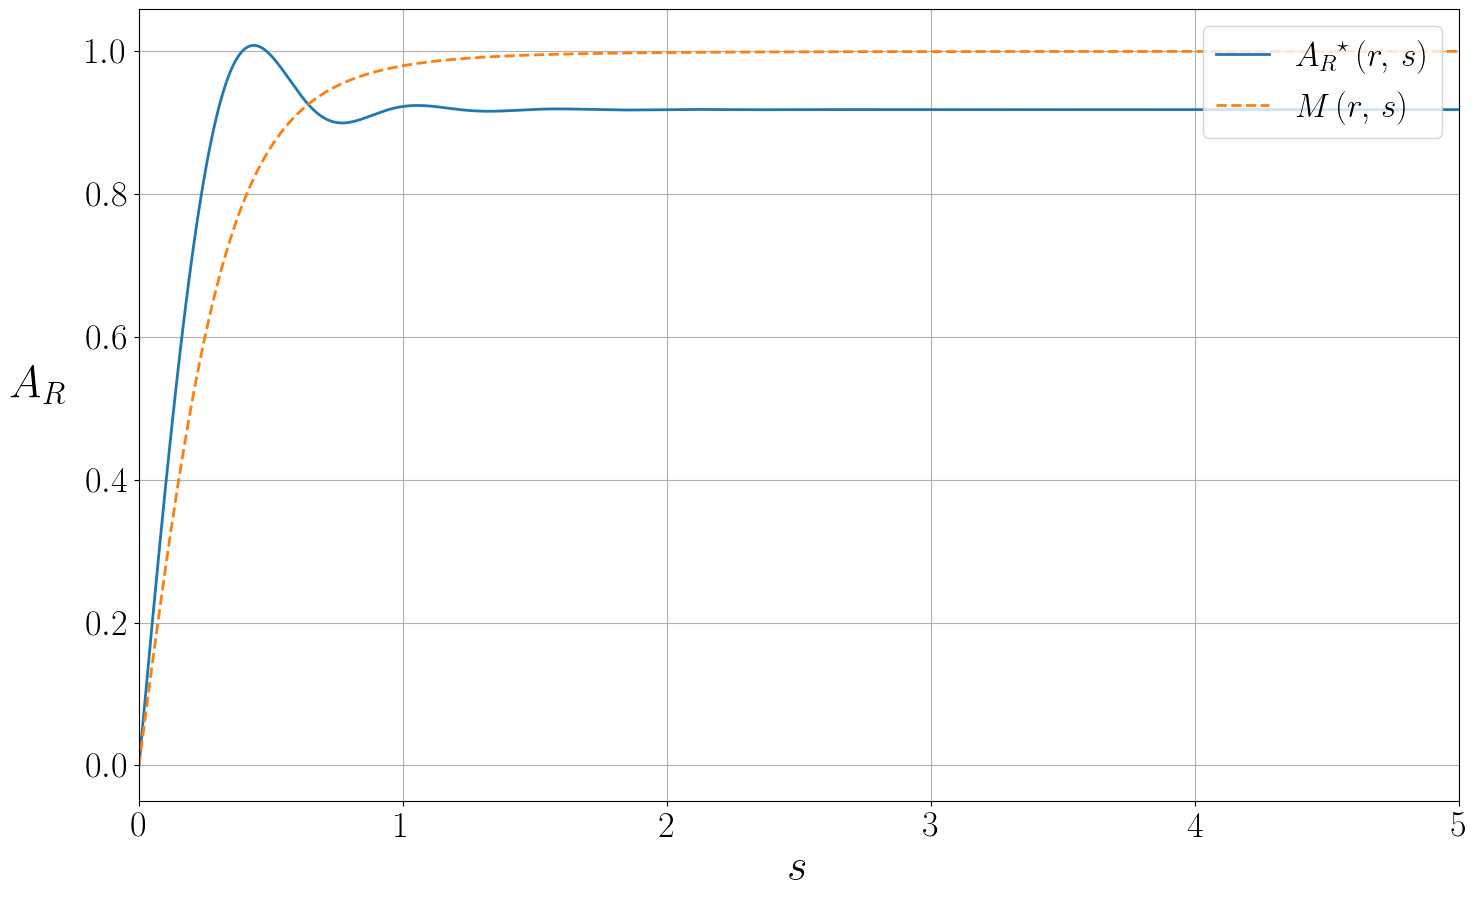

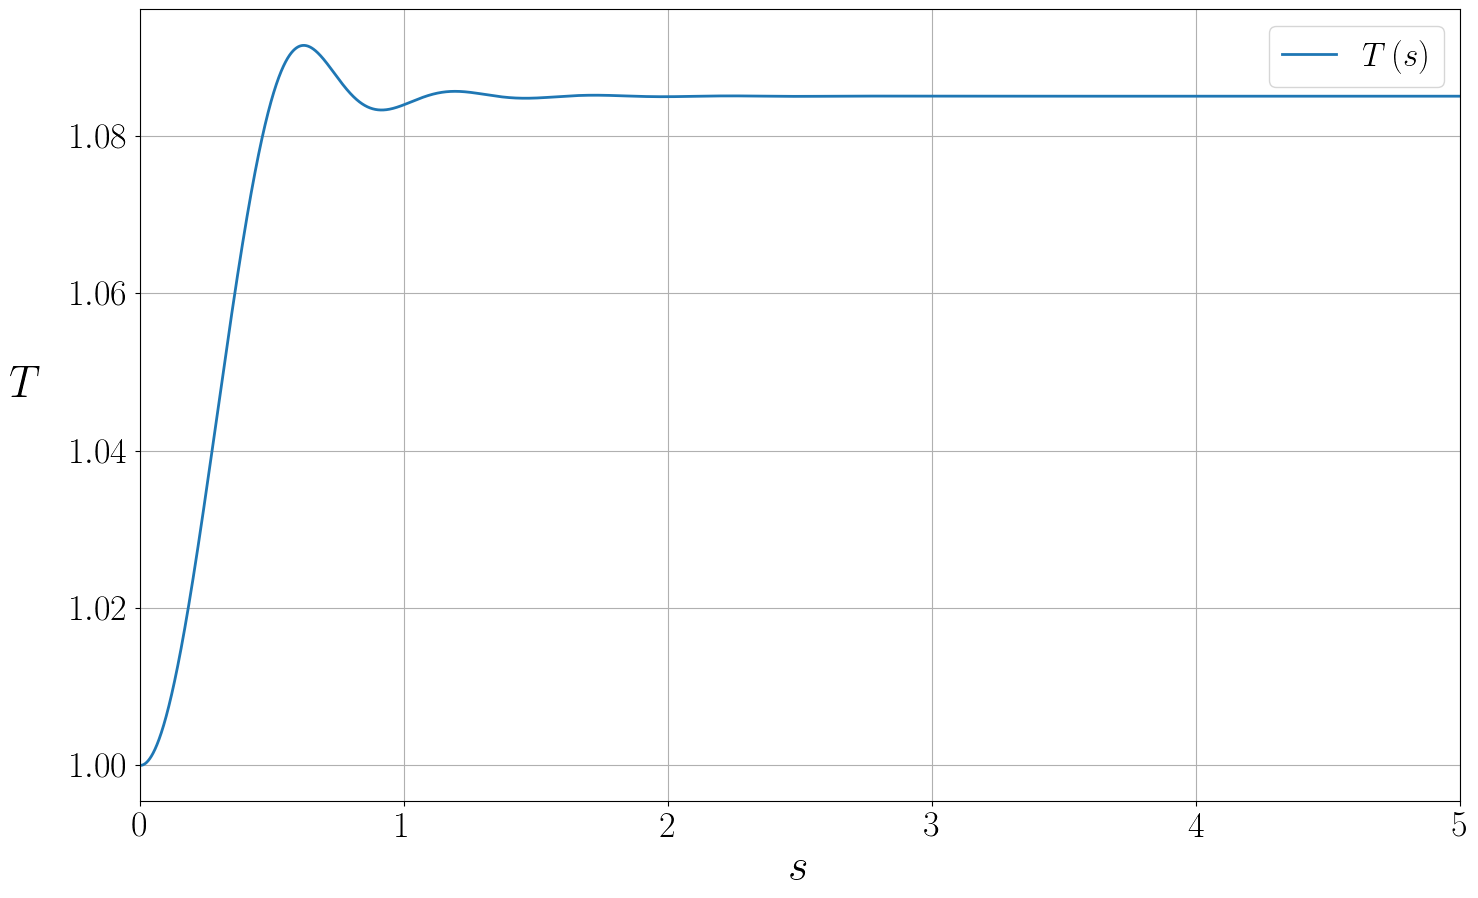

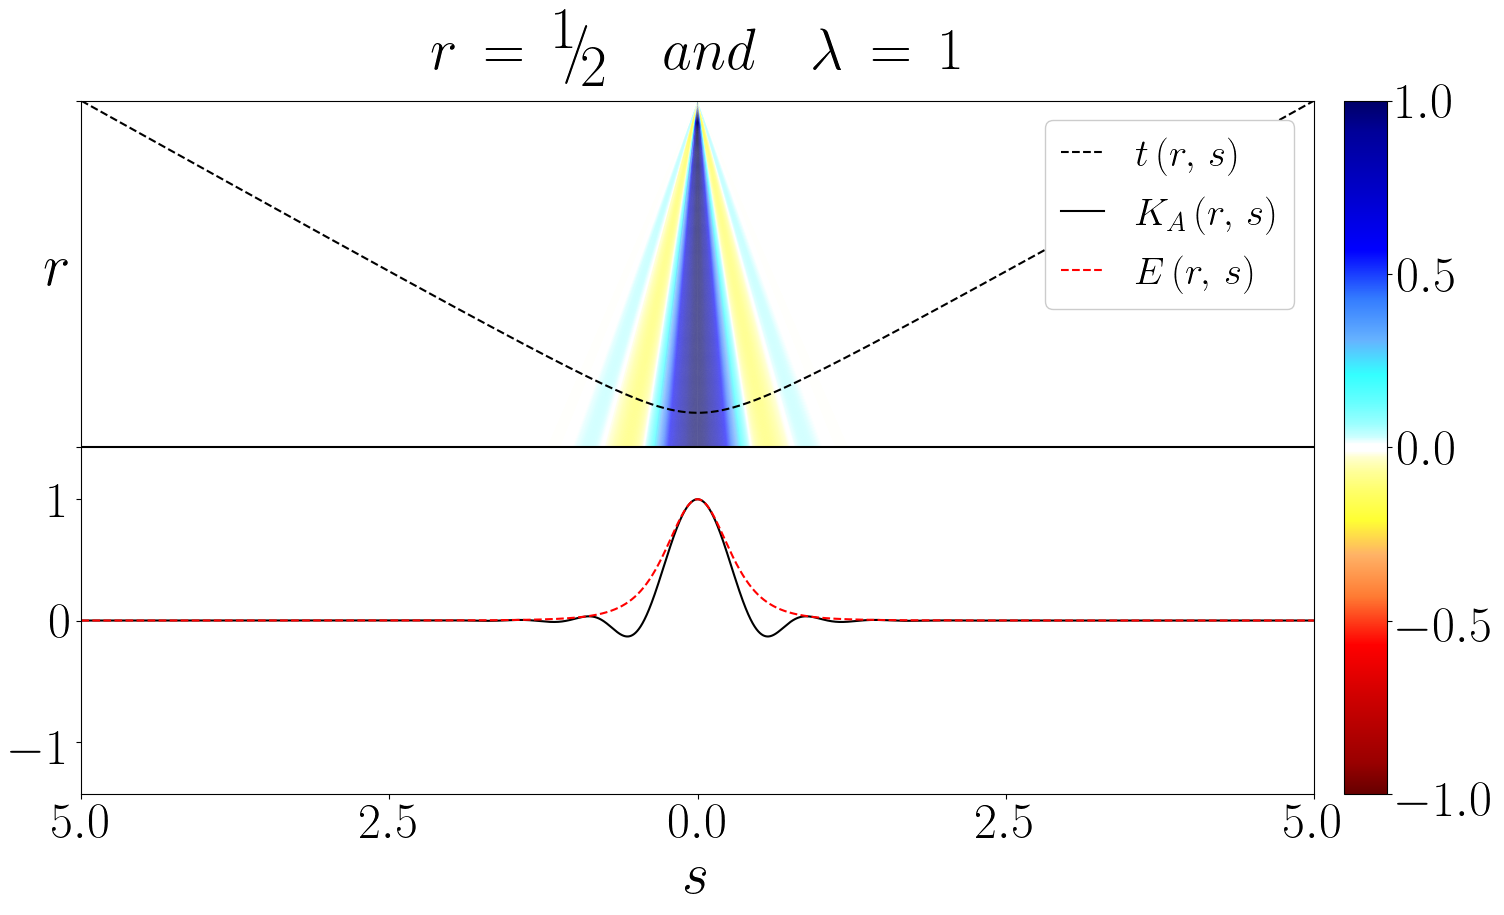

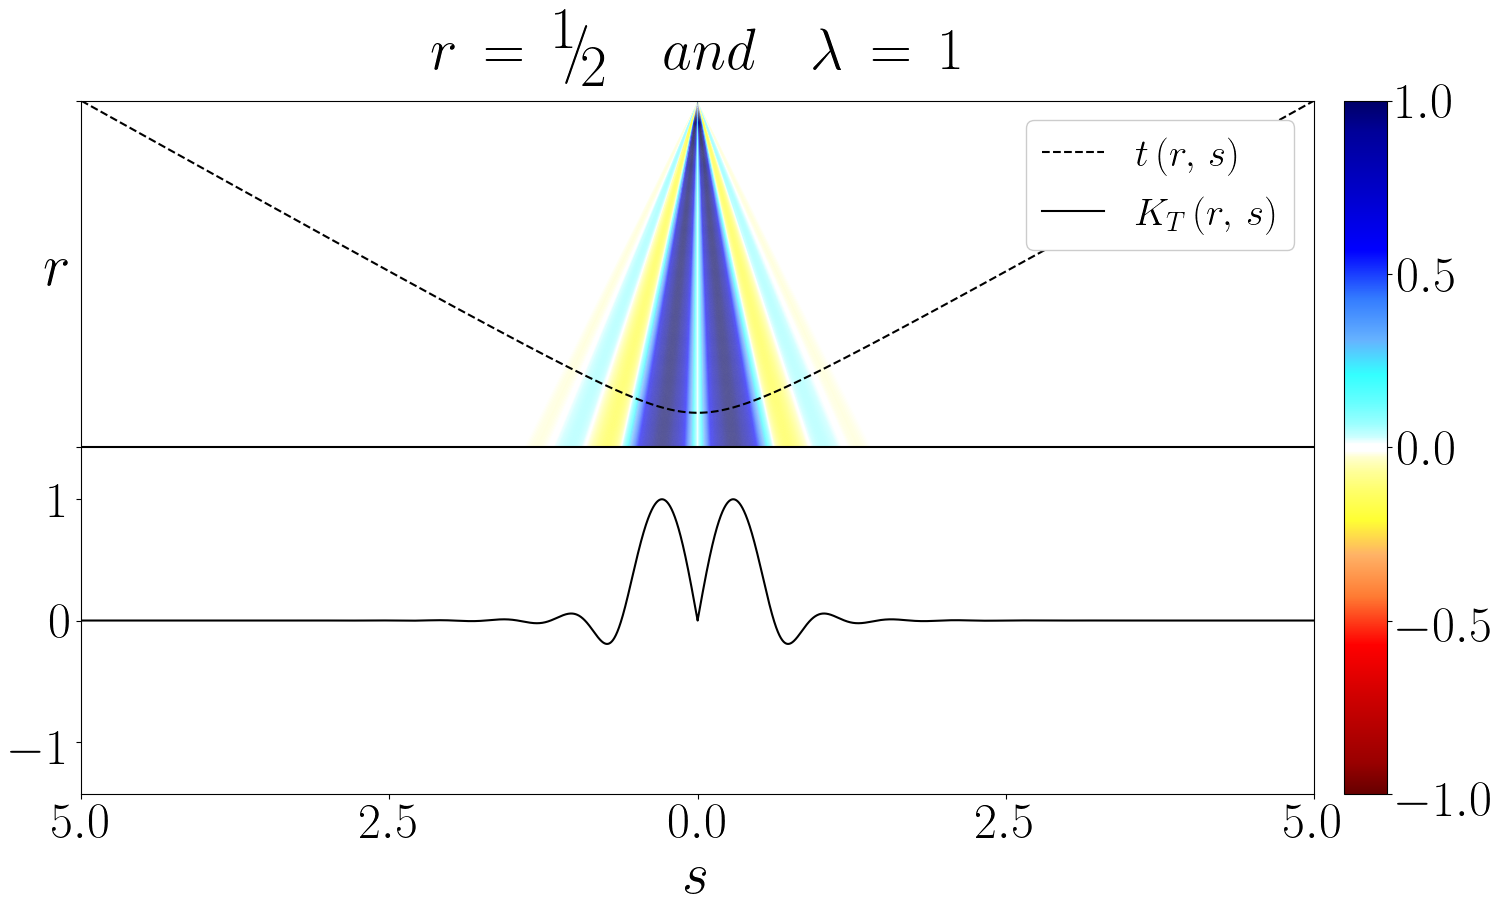

In [ ]:
  s = np.linspace (0, smax, ns)

  A, M, dA, E, T, dT = fresnel (ns, nt, f, c, r, smax)

  fig = plt.figure (figsize = (15, 9), dpi = 100)

  plt.plot (s, A, linewidth = 2, label = r'${A_{R}}^{\star}\,(r,\,s)$')
  plt.plot (s, M, linewidth = 2, linestyle = 'dashed',
            label = r'$M\,(r,\,s)$')

  plt.tick_params (axis = 'x', labelsize = 26)
  plt.tick_params (axis = 'y', labelsize = 26)
  plt.xlabel (r'$s$', fontsize = 32)
  plt.ylabel (r'$A_{R}$', fontsize = 32, rotation = 0, labelpad = 35)
  plt.xlim (0, smax)
  plt.legend (fontsize = 24, handlelength = 1.6, loc = 1)
  plt.grid ()

  plt.subplots_adjust (left = 0.1, bottom = 0.1,
                       top = 0.98, right = 0.98)

  plt.show ()

  fig = plt.figure (figsize = (15, 9), dpi = 100)

  plt.plot (s, T, linewidth = 2, label = r'$T\,(s)$')

  plt.tick_params (axis = 'x', labelsize = 26)
  plt.tick_params (axis = 'y', labelsize = 26)
  plt.xlabel (r'$s$', fontsize = 32)
  plt.ylabel (r'$T$', fontsize = 32, rotation = 0, labelpad = 35)
  plt.xlim (0, smax)
  plt.legend (fontsize = 24, handlelength = 1.6, loc = 1)
  plt.grid ()

  plt.subplots_adjust (left = 0.1, bottom = 0.1,
                       top = 0.98, right = 0.98)

  plt.show ()

  fig = plt.figure (figsize = (15, 9), dpi = 100)
  ax = fig.add_subplot (111)

  s  = np.append (-s[1:][::-1], s)
  dA = np.append (dA[1:][::-1], dA)
  E  = np.append (E[1:][::-1], E)

  dA /= (2 * np.abs (dA).max ())
  E  /= (2 * E.max ())

  cmap, norm = createCmap ('tomo.cpt')

  colors = cmap (dA + 0.5)

  for i in range (2 * (ns - 1)):

    ax.add_patch (Polygon ([[0, r], [s[i], 0], [s[i + 1], 0]],
                           facecolor = colors[i], linewidth = 0))

  ax.axhline (y = 0, color = 'black')

  tt_curve = tt (r, s, c)

  plt.plot (s, tt_curve * r / (tt_curve.max ()), color = 'black',
            linewidth = 1.5, linestyle = 'dashed',
            label = r'$t\,(r,\,s)$')
  plt.plot (s, (0.7 * dA - 0.5) * r, color = 'black', linewidth = 1.5,
            label = r'$K_{A}\,(r,\,s)$')
  plt.plot (s, (0.7 * E - 0.5) * r, color = 'red', linewidth = 1.5,
            linestyle = 'dashed', label = r'$E\,(r,\,s)$')
  plt.tick_params (axis = 'x', labelsize = 36)
  plt.tick_params (axis = 'y', labelsize = 36)
  plt.xlabel (r'$s$', fontsize = 42)
  plt.ylabel (r'$r$', rotation = 'horizontal', fontsize = 42,
              labelpad = 25)
  plt.xlim (-smax, smax)
  plt.ylim (-r, r)
  plt.legend (loc = 1, fontsize = 28, handlelength = 1.1,
              framealpha = 1)

  ax.yaxis.set_label_coords (-0.02, 0.717)

  ticks  = np.linspace (-smax, smax, 5)
  labels = [f'${abs (tick)}$' for tick in ticks]

  ax.set_xticks (ticks)
  ax.set_xticklabels (labels)

  ticks  = np.array ([0, r])
  labels = ['', '']

  ticks  = np.concatenate ([np.array ([-0.85 * r,
                                       -0.5 * r,
                                       -0.15 * r]), ticks])
  labels = [r'$-1$', r'$0$', r'$1$'] + labels

  ax.set_yticks (ticks)
  ax.set_yticklabels (labels)

  sm = plt.cm.ScalarMappable (cmap = cmap, norm = norm)
  sm._A = []
  cbar = plt.colorbar (sm, pad = 0.02, aspect = 16)
  cbar.ax.tick_params (labelsize = 36)
  cbar.set_ticks ([-1.0, -0.5, 0, 0.5, 1.0])

  rlabel = int (r)

  if r % 1 != 0:

    frc = Fraction (str (r))
    ntr, dtr = int (frc.numerator), int (frc.denominator)
    spc = '\mskip -5mu/\mskip -3mu'
    rlabel = f'{{}}^{{\displaystyle{ntr}}}{spc}_{{\displaystyle{dtr}}}'

  lbdlabel = int (c / f)

  if c % f != 0:

    ntr, dtr = int (c), int (f)
    spc = '\mskip -5mu/\mskip -3mu'
    lbdlabel = f'{{}}^{{\displaystyle{ntr}}}{spc}_{{\displaystyle{dtr}}}'

  plt.title (f'$r\,=\,{rlabel}\quad and \quad\lambda\,=\,{lbdlabel}$',
             fontsize = 42, y = 1.035)

  plt.subplots_adjust (left = 0.05, bottom = 0.12,
                       top = 0.89, right = 1.04)

  plt.show ()

  fig = plt.figure (figsize = (15, 9), dpi = 100)
  ax = fig.add_subplot (111)

  dT = np.append (dT[1:][::-1], dT)

  dT /= (2 * np.abs (dT).max ())

  colors = cmap (dT + 0.5)

  for i in range (2 * (ns - 1)):

    ax.add_patch (Polygon ([[0, r], [s[i], 0], [s[i + 1], 0]],
                  facecolor = colors[i], linewidth = 0))

  ax.axhline (y = 0, color = 'black')

  tt_curve = tt (r, s, c)

  plt.plot (s, tt_curve * r / (tt_curve.max ()), color = 'black',
            linewidth = 1.5, linestyle = 'dashed',
            label = r'$t\,(r,\,s)$')
  plt.plot (s, (0.7 * dT - 0.5) * r, color = 'black',
            linewidth = 1.5, label = r'$K_{T}\,(r,\,s)$')
  plt.tick_params (axis = 'x', labelsize = 36)
  plt.tick_params (axis = 'y', labelsize = 36)
  plt.xlabel (r'$s$', fontsize = 42)
  plt.ylabel (r'$r$', rotation = 'horizontal', fontsize = 42)
  plt.xlim (-smax, smax)
  plt.ylim (-r, r)
  plt.legend (loc = 1, fontsize = 28, handlelength = 1.6,
              framealpha = 1)

  ax.yaxis.set_label_coords (-0.02, 0.717)

  ticks  = np.linspace (-smax, smax, 5)
  labels = [f'${abs (tick)}$' for tick in ticks]

  ax.set_xticks (ticks)
  ax.set_xticklabels (labels)

  ticks  = np.array ([0, r])
  labels = ['', '']

  ticks  = np.concatenate ([np.array ([-0.85 * r,
                                       -0.5 * r,
                                       -0.15 * r]), ticks])
  labels = [r'$-1$', r'$0$', r'$1$'] + labels

  ax.set_yticks (ticks)
  ax.set_yticklabels (labels)

  sm = plt.cm.ScalarMappable (cmap = cmap, norm = norm)
  sm._A = []
  cbar = plt.colorbar (sm, pad = 0.02, aspect = 16)
  cbar.ax.tick_params (labelsize = 36)
  cbar.set_ticks ([-1.0, -0.5, 0, 0.5, 1.0])

  plt.title (f'$r\,=\,{rlabel}\quad and \quad\lambda\,=\,{lbdlabel}$',
             fontsize = 42, y = 1.035)

  plt.subplots_adjust (left = 0.05, bottom = 0.12,
                       top = 0.89, right = 1.04)

  plt.show ()